In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_30279_I')

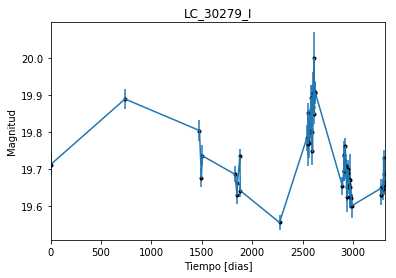

In [2]:
data = np.genfromtxt('LC_30279_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_30279_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

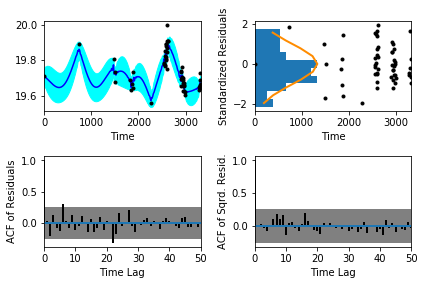

In [5]:
sample.assess_fit()

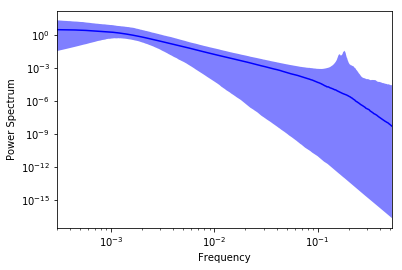

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_30279_I')

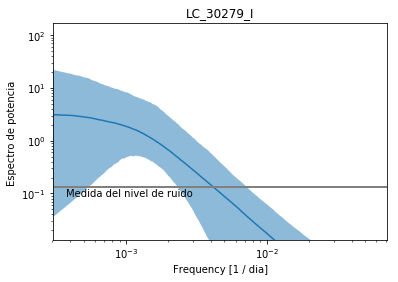

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_30279_I')

Text(0.5,1,'Prediccion , valor esperado LC_30279_I')

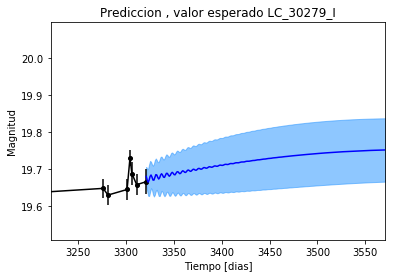

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_30279_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_30279_I')

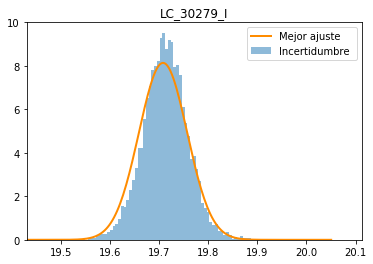

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_30279_I')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_I')

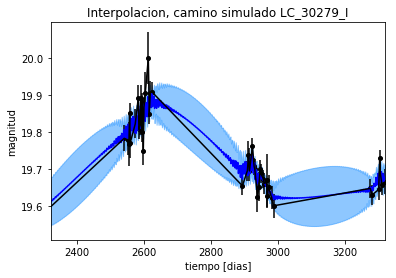

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_I')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_I')

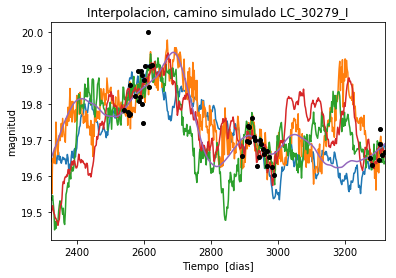

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 382.323145153
Median: 0.00630208082439
Standard deviation: 0.171962535619
68% credibility interval: [ 0.0010741   0.10117572]
95% credibility interval: [  3.55070680e-04   7.03256096e-01]
99% credibility interval: [  3.14011173e-04   9.82422346e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 771.171278496
Median: 0.00308438156301
Standard deviation: 0.0849526162114
68% credibility interval: [ 0.00063883  0.01851121]
95% credibility interval: [ 0.00033559  0.20434708]
99% credibility interval: [  3.08430813e-04   6.73816810e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 289.021728762
Median: 0.0572600441132
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 160.27868997
Median: 105.613103809
Standard deviation: 2.95366966168
68% credibility interval: [ 103.5985292   109.99392013]
95% credibility interval: [ 101.24930429  112.08430913]
99% credibility interval: [  99.31944174  113.04182807]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 190.890869036
Median: 0.957337082511
Standard deviation: 2.2955415612
68% credibility interval: [ 0.070726    4.44746094]
95% credibility interval: [ 0.01942634  7.42108495]
99% credibility interval: [  1.12718755e-02   1.16920920e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1685.87608924
Median: 1.2659503864
Standard deviation: 8.37047797607
68% credibility interval: [ 0.02839249  5.66772784]
95% credibility interval: [  5.1169

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 139.2958566
Median: 3.57502507364e-13
Standard deviation: 9.54798253714e+85
68% credibility interval: [  1.27545862e-49   9.91807526e+23]
95% credibility interval: [  7.38357886e-64   4.13698312e+85]
99% credibility interval: [  4.81936381e-76   4.57808889e+86]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 748.522497939
Median: 19.7162981788
Standard deviation: 0.0476981364361
68% credibility interval: [ 19.68016479  19.75900624]
95% credibility interval: [ 19.63147677  19.83071175]
99% credibility interval: [ 19.5906398  19.8770682]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 591.164115478
Median: 0.158446318532
Standard deviation: 0.20968150712
68% credibility interval: [ 0.          0.23769961]
95% credibility interval: [ 0.          0.83481421]
99% credibility interval: [ 0.          0.99727828]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 591.164115478
Median: 0.158446318532
Standard deviation: 0.20968150712
68% credibility interval: [ 0.          0.23769961]
95% credibility interval: [ 0.          0.83481421]
99% credibility interval: [ 0.          0.99727828]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 601.77384844
Median: 0.0
Standard deviation: 0.000594879641096
68% credibi

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 160.27868997
Median: 105.613103809
Standard deviation: 2.95366966168
68% credibility interval: [ 103.5985292   109.99392013]
95% credibility interval: [ 101.24930429  112.08430913]
99% credibility interval: [  99.31944174  113.04182807]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 440.919312204
Median: 0.011641760222
Standard deviation: 0.0124071183761
68% credibility interval: [ 0.00714673  0.02139949]
95% credibility interval: [ 0.00464084  0.04527911]
99% credibility interval: [ 0.0038055  0.0723727]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 296.765126395
Median: 1.24106076348
Standard deviation: 0.277348533635
68% credibility interval: [ 0.94220824  1.53178041]
95% credibility interval: [ 0.75578288  1.7979144 ]
99% credibility interval: [ 0.6788029   1.92834261]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 449.627086472
Median: 0.000257289978753
Standard deviation: 0.147434435707
68% credibility interval: [  2.22523451e-28   3.33581302e-02]
95% credibility interval: [  2.55438740e-88   2.54178518e-01]
99% credibility interval: [  2.14375033e-89   8.44880768e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 382.323145153
Median: (-0.0395971416405-0.845018492339j)
Standard deviation: 1.70386093477
68% credibility interval: [-0.63570578-1.3425896j  -0.00674880-1.08591815j]
95% credibility interval: [ -4.41868837e+00+0.j          -2.23097488e-03-0.01073496j]
99% credibility interval: [ -6.17274165e+00+0.j          -1.97299039e-03-0.01135513j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 771.171278496
Median: (-0.0193797409184+1.10138700742j)
Standard deviation: 1.42149040047
68% credibility interval: [-0.11630934+1.01488712j -0.00401387+0.00975945j]
95% credibility interval: [-1.28395055+5.98122568j -0.00210856+0.00746197j]
99% credibility interval: [ -4.23371588e+00+3.9074323j  -1.93792795e-03+0.j       ]
Posterior summa